![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

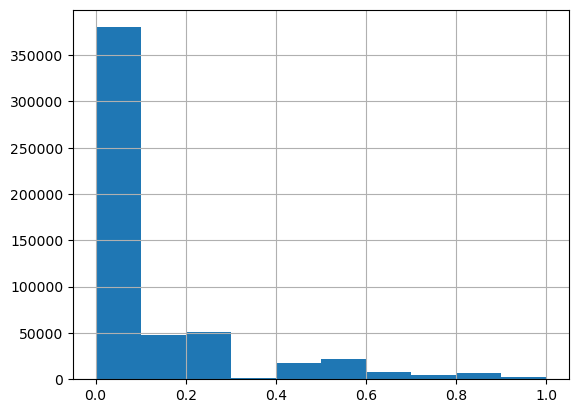

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Preprocesamiento de texto con CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [10]:
# Visualización de diccionario de palabras con su respectivo ID asignado
vectorizer.vocabulary_

{'oral': 91127,
 'history': 60749,
 'is': 67439,
 'what': 136457,
 'ever': 46583,
 'they': 125107,
 'say': 110750,
 'it': 67682,
 'nazis': 86202,
 'in': 64454,
 'the': 124581,
 '1930': 1649,
 'did': 38596,
 'eugenic': 46371,
 'experiments': 47347,
 'on': 90518,
 'native': 86035,
 'children': 27384,
 'at': 14725,
 'mcgill': 80014,
 'with': 137734,
 'full': 52599,
 'knowledge': 71877,
 'of': 89814,
 'government': 55832,
 'yup': 139920,
 'if': 63495,
 'happened': 58373,
 'who': 136894,
 'are': 13363,
 'we': 135729,
 'to': 126248,
 'didn': 38619,
 'marijuana': 78894,
 'less': 74583,
 'harmful': 58542,
 'human': 62386,
 'health': 59284,
 'than': 124498,
 'cigarettes': 28085,
 'which': 136645,
 'widely': 137099,
 'used': 132446,
 'and': 11703,
 'there': 124961,
 'no': 87715,
 'ban': 16514,
 'reduces': 104654,
 'stress': 120277,
 'aggression': 9490,
 'level': 74674,
 'leading': 73899,
 'crime': 33788,
 'its': 67777,
 'medical': 80457,
 'value': 132943,
 'favorable': 48684,
 'effects': 43479,


In [11]:

# Creación del modelo RandomForestRegressor con parámetros ajustados
model = RandomForestRegressor(n_estimators=10, max_depth=5)  # Reducir el número de árboles a 10 y la profundidad máxima a 5

# Entrenar el modelo con los datos vectorizados
model.fit(X_train_vect, y_train)  # Asumiendo que y_train ya está en la forma adecuada

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test_vect)

# Calcular MSE
mse_CountVectorizer = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_CountVectorizer}')

MSE: 0.03307198110699907


Usando la función CountVectorizer para preprocesar los comentarios y modelando la información con un Random Forest Regressor obtenemos un MSE de 0.033. Este MSE bajo sugiere que el modelo tiene un buen rendimiento en el conjunto de test.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Preprocesamiento de texto con CountVectorizer usando trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Modelo
model = RandomForestRegressor(n_estimators=10, max_depth=5)

# Entrenamiento del modelo con los datos vectorizados
model.fit(X_train_vect, y_train)

# Predicción de los valores para el conjunto de prueba
y_pred = model.predict(X_test_vect)

# Calcular MSE
mse_CountVectorizer_tri = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse_CountVectorizer_tri}')

MSE: 0.03863488577696647


Usando la función CountVectorizer e incluyendo trigramas para preprocesar los comentarios, modelamos la información con el mismo modelo Random Forest Regressor obteniendo un MSE de 0.03863. Este MSE también muestra un buen rendimiento, sin embargo es mayor que CountVectorizer sin trigramas, por lo que por lo pronto no es el mejor modelo

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Descripción:
El TfidfVectorizer (Term Frequency-Inverse Document Frequency Vectorizer) es una técnica de tokenización utilizada en el procesamiento de lenguaje natural (NLP) que convierte una colección de documentos de texto en una representación numérica, teniendo en cuenta tanto la frecuencia de las palabras en un documento como su importancia relativa en la colección de documentos.

### Funcionamiento:
- TF (Frecuencia del Término): Mide la frecuencia de una palabra en un documento específico. Cuantas más veces aparezca una palabra en un documento, mayor será su valor de TF.

- IDF (Frecuencia Inversa del Documento): Mide la rareza de una palabra en una colección de documentos. Cuantas menos veces aparezca una palabra en todos los documentos de la colección, mayor será su valor de IDF. Esto ayuda a penalizar las palabras que aparecen en muchos documentos y son menos informativas.

- TF-IDF (TF * IDF): Es el producto de TF y IDF. Cuanto más alta sea la puntuación TF-IDF de una palabra en un documento, más importante es esa palabra en ese documento específico y en la colección de documentos en general.

- Vectorizer: TfidfVectorizer convierte la colección de documentos de texto en una matriz donde cada fila representa un documento y cada columna representa una palabra. Los valores en la matriz son los puntajes TF-IDF de las palabras en cada documento.

### Comparado con CountVectorizer:
#### Las ventajas son:

- Importancia relativa: TF-IDF pondera la importancia relativa de las palabras en función de su frecuencia en el documento y su rareza en la colección de documentos, lo que proporciona una representación más significativa de los documentos.

- Penalización de palabras comunes: TF-IDF penaliza las palabras que aparecen con frecuencia en todos los documentos, lo que ayuda a destacar las palabras más distintivas de cada documento.

- Mejor rendimiento en documentos largos: TF-IDF tiende a funcionar mejor en documentos más largos en comparación con CountVectorizer, ya que tiene en cuenta la rareza de las palabras en la colección de documentos.

#### Las desventajas son:

- Mayor complejidad computacional: Calcular los puntajes TF-IDF puede ser más costoso computacionalmente en comparación con el recuento de palabras en CountVectorizer, especialmente para colecciones de documentos grandes.

- Menos adecuado para documentos cortos: En documentos cortos o con vocabularios limitados, TF-IDF puede no capturar suficiente información, ya que la rareza de las palabras puede ser menos relevante.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear y ajustar TfidfVectorizer
vect_tfidf = TfidfVectorizer()
X_train_tfidf = vect_tfidf.fit_transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

# Crear y entrenar modelo de Random Forest Regressor
model_random_forest = RandomForestRegressor(n_estimators=10, max_depth=5)
model_random_forest.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_random_forest = model_random_forest.predict(X_test_tfidf)

# Calcular el MSE
mse_TfidfVectorizer = mean_squared_error(y_test, y_pred_random_forest)
print("MSE usando RandomForestRegressor:", mse_TfidfVectorizer)

MSE usando RandomForestRegressor: 0.03295057259694008


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

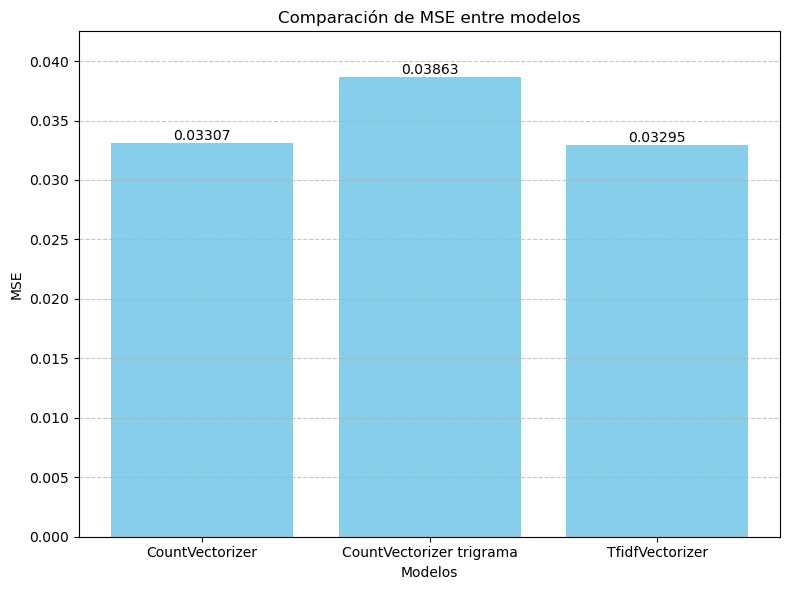

In [14]:
import matplotlib.pyplot as plt

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(["CountVectorizer","CountVectorizer trigrama", "TfidfVectorizer"], [mse_CountVectorizer, mse_CountVectorizer_tri, mse_TfidfVectorizer], color='skyblue')

# Agregar etiquetas a las barras
for i, valor in enumerate([mse_CountVectorizer, mse_CountVectorizer_tri, mse_TfidfVectorizer]):
    plt.text(i, valor, f'{valor:.5f}', ha='center', va='bottom')

# Títulos y etiquetas
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')
plt.ylim(0, max([mse_CountVectorizer, mse_CountVectorizer_tri, mse_TfidfVectorizer]) * 1.1)  # Establecer límites en el eje y para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Conclusiones

TF-IDF parece ser el método de preprocesamiento más adecuado para este problema de NLP con utlizando un modelo de Random Forest Regressor.

- CountVectorizer podría ser **el menos efectivo para capturar información semántica** al no considerar el contexto de las palabras. Y para este caso es valioso porque queremos predecir si un comentario es tóxico o no. No obtante, su resultado fue el segundo mejor superando al CountVectorizer con trigramas.

- CountVectorizer con trigramas sugiere que la incorporación de trigramas no mejora el rendimiento del modelo en este caso. A pesar de que permite **capturar relaciones locales entre palabras cercanas**, no es útil en este contexto y muestra el peor MSE. Pero podría serlo para tareas como la clasificación de temas.

- TFidf vectorizer **asigna ponderaciones a las palabras en función de su importancia**, lo que reduce el impacto de palabras comunes. Esto lleva a que sea más adecuado para tareas donde la relevancia de las palabras es crucial, como en este caso. El MSE es el más bajo entre los 3 métodos.


Adicional, gracias a utilizar el mismo modelo con los mismo hiperparámetros se puede evidenciar facilmente el impacto del preprocesamiento en ellos.